# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.015174e+01     7.688763e+00
 * time: 0.004790067672729492
     1     2.525156e+01     3.566944e+00
 * time: 0.014592885971069336
     2     1.722754e+01     3.445138e+00
 * time: 0.03740191459655762
     3     1.411541e+01     2.855406e+00
 * time: 0.0687260627746582
     4     1.240827e+01     3.403319e+00
 * time: 0.08771300315856934
     5     1.220389e+01     2.163211e+00
 * time: 0.1065070629119873
     6     1.063890e+01     1.401370e+00
 * time: 0.12482500076293945
     7     9.911317e+00     1.453641e+00
 * time: 0.14283204078674316
     8     9.603606e+00     1.385493e+00
 * time: 0.16124701499938965
     9     9.459889e+00     1.173256e+00
 * time: 0.17954802513122559
    10     9.340885e+00     9.896031e-01
 * time: 0.19843602180480957
    11     9.235638e+00     5.512006e-01
 * time: 0.21649503707885742
    12     9.176832e+00     5.870510e-01
 * time: 0.23036408424377441
    13     9.137579e+00     4.192749e-01
 * time:

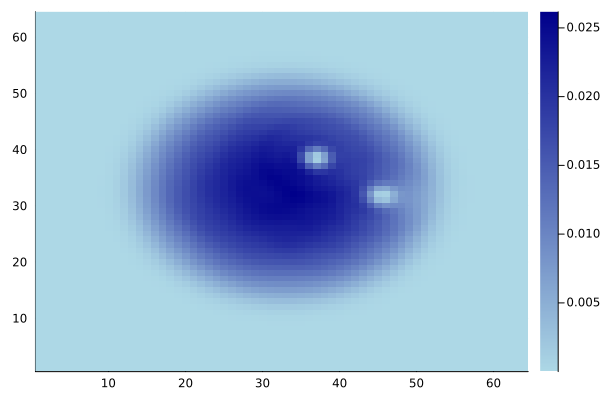

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)